In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text
from mplsoccer import Bumpy
import numpy as np
import urllib.request

from PIL import Image
from io import BytesIO

In [97]:
df = pd.read_csv('positions.csv', delimiter = ';') 
df.head()

,Team,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,Manchester City,3,2,1,1,1,1,1,3,2,...,2,2,2,2,1,1,1,1,1,1
1,Tottenham,9,6,3,2,2,4,2,1,1,...,5,5,5,4,5,5,5,5,5,5
2,Liverpool,12,5,4,3,3,2,4,4,4,...,3,3,3,3,3,3,3,3,3,3
3,Arsenal,4,3,5,5,4,5,3,2,3,...,1,1,1,1,2,2,2,2,2,2
4,Aston Villa,20,9,7,9,7,6,5,5,5,...,4,4,4,5,4,4,4,4,4,4


In [98]:
#teams need to be column names while row names should be weeks
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Team,Manchester City,Tottenham,Liverpool,Arsenal,Aston Villa,Newcastle Utd,Brighton,Manchester Utd,Brentford,Chelsea,Crystal Palace,West Ham,Wolves,Nott'ham Forest,Fulham,Everton,Luton Town,Bournemouth,Burnley,Sheffield Utd
1,3,9,12,4,20,1,2,7,8,11,5,13,17,14,6,15,18,10,19,16
2,2,6,5,3,9,8,1,12,4,14,10,7,19,11,13,20,17,15,18,16
3,1,3,4,5,7,13,6,8,9,10,11,2,15,14,12,20,19,16,18,17
4,1,2,3,5,9,13,6,10,8,11,7,4,14,16,12,20,19,17,15,18


In [99]:
#reset the column names so that we drop the transposed team names
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head()

Team,Manchester City,Tottenham,Liverpool,Arsenal,Aston Villa,Newcastle Utd,Brighton,Manchester Utd,Brentford,Chelsea,Crystal Palace,West Ham,Wolves,Nott'ham Forest,Fulham,Everton,Luton Town,Bournemouth,Burnley,Sheffield Utd
1,3,9,12,4,20,1,2,7,8,11,5,13,17,14,6,15,18,10,19,16
2,2,6,5,3,9,8,1,12,4,14,10,7,19,11,13,20,17,15,18,16
3,1,3,4,5,7,13,6,8,9,10,11,2,15,14,12,20,19,16,18,17
4,1,2,3,5,9,13,6,10,8,11,7,4,14,16,12,20,19,17,15,18
5,1,2,3,4,7,11,5,12,10,13,8,6,17,15,9,20,19,16,14,18


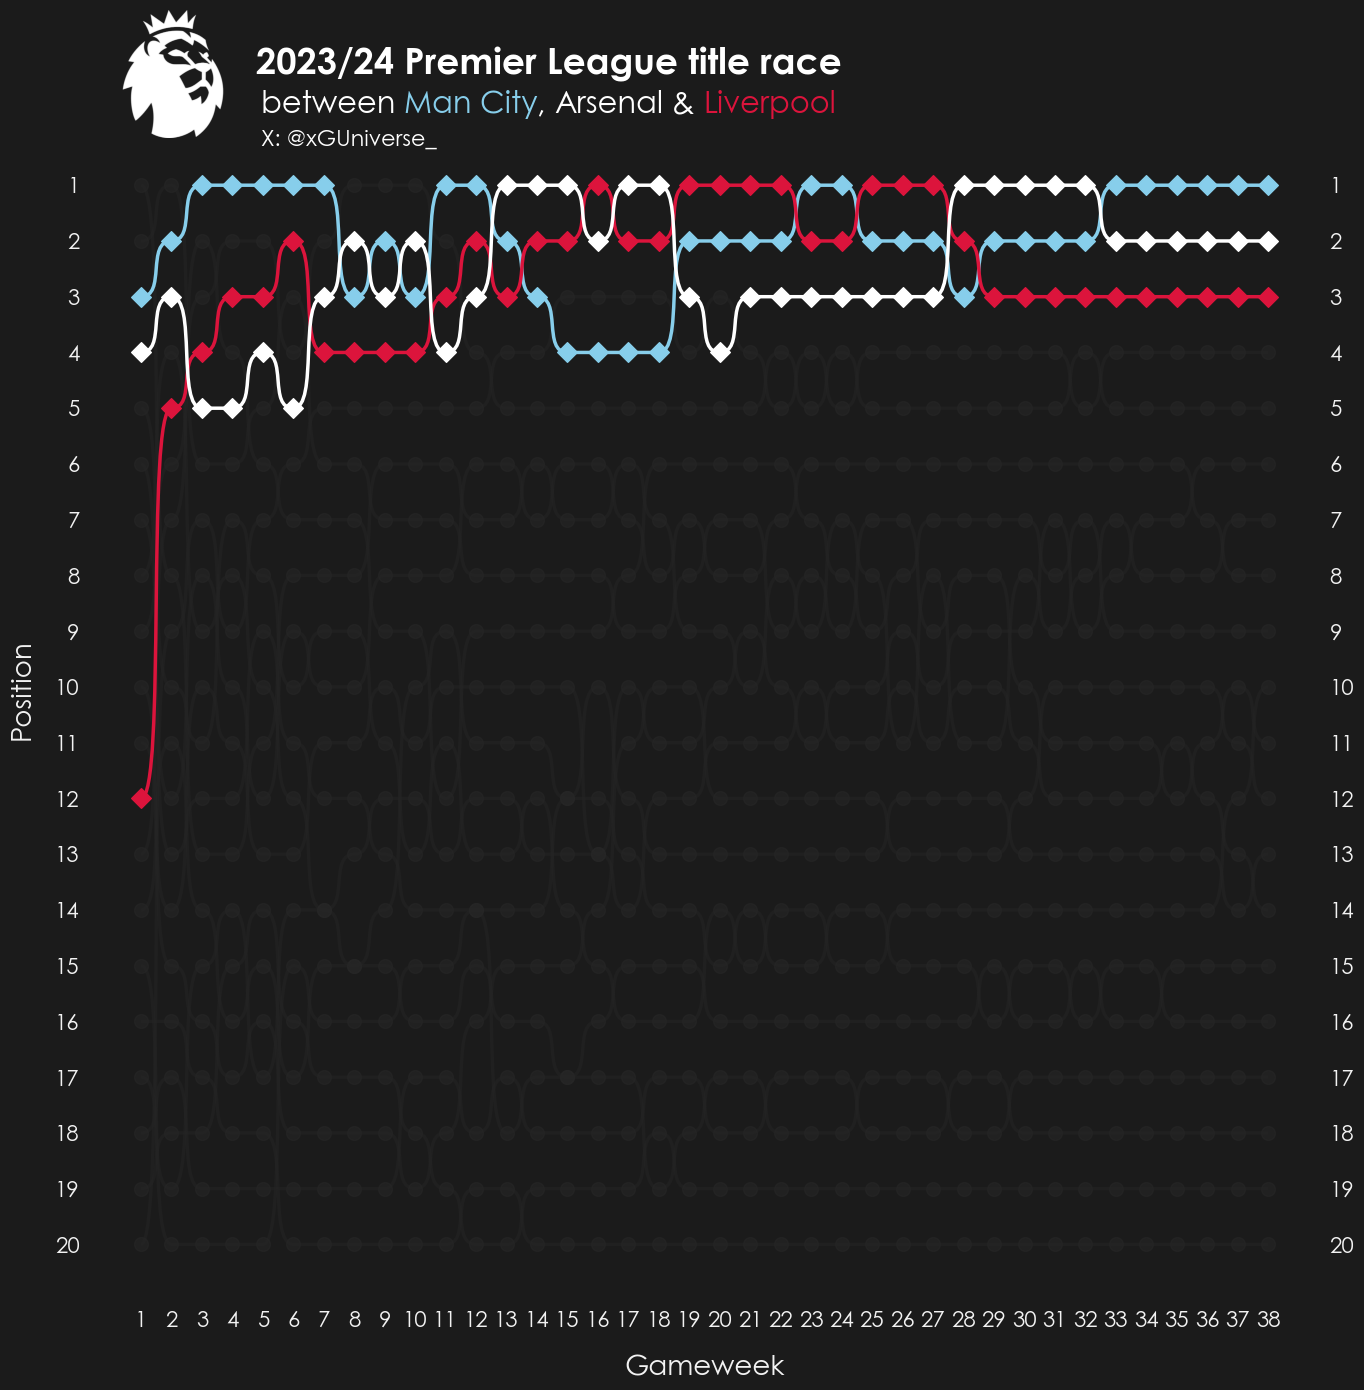

In [178]:
plt.rcParams['font.family'] = 'Century Gothic'

bumpy = Bumpy(
    scatter_color = '#282828', line_color = '#252525',
    ticklabel_size = 16,
    scatter_primary = 'D',
    show_right = True,
    plot_labels = True,
)

#highlight dictionary to pass in the color. search team color codes in google to get your teams hex colors
highlight_dict = {
    'Manchester City':'skyblue',
    'Arsenal':'white',
    'Liverpool':'crimson',
}

fig,ax = bumpy.plot(
    x_list = np.linspace(1,38,38).astype(int),
    y_list = np.linspace(1,20,20).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (16,16),
    ylim = (-.1,22),
    lw = 2.5
)


# Set axis labels
ax.set_xlabel('Gameweek')
ax.xaxis.set_label_coords(0.5, -.04)

ax.set_ylabel('Position')
ax.yaxis.set_label_coords(-.04, 0.5)

fig.text(x = .415, y = .88,
        s = '2023/24 Premier League title race',
        c = 'white',size=26,weight='bold',ha='center',
        )

highlight_text.fig_text(x =.415, y = .87, 
                       s = 'between <Man City>, <Arsenal> & <Liverpool>',
                       highlight_textprops = [
                           {"color":'skyblue'},
                           {"color":'white'},
                           {"color":'crimson'},
                       ],
                        size = 22,
                        color = 'white',
                        ha='center'
                       )

highlight_text.fig_text(x =.29, y = .845, 
                       s = 'X: @xGUniverse_',
                        size = 16,
                        color = 'white',
                        ha = 'center'
                       )


logo_ax = fig.add_axes([0.14, 0.84, 0.08, 0.08], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"https://assets.ifttt.com/images/channels/2114875453/icons/monochrome_large.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#plt.savefig('title race.png', dpi=400, bbox_inches = 'tight')

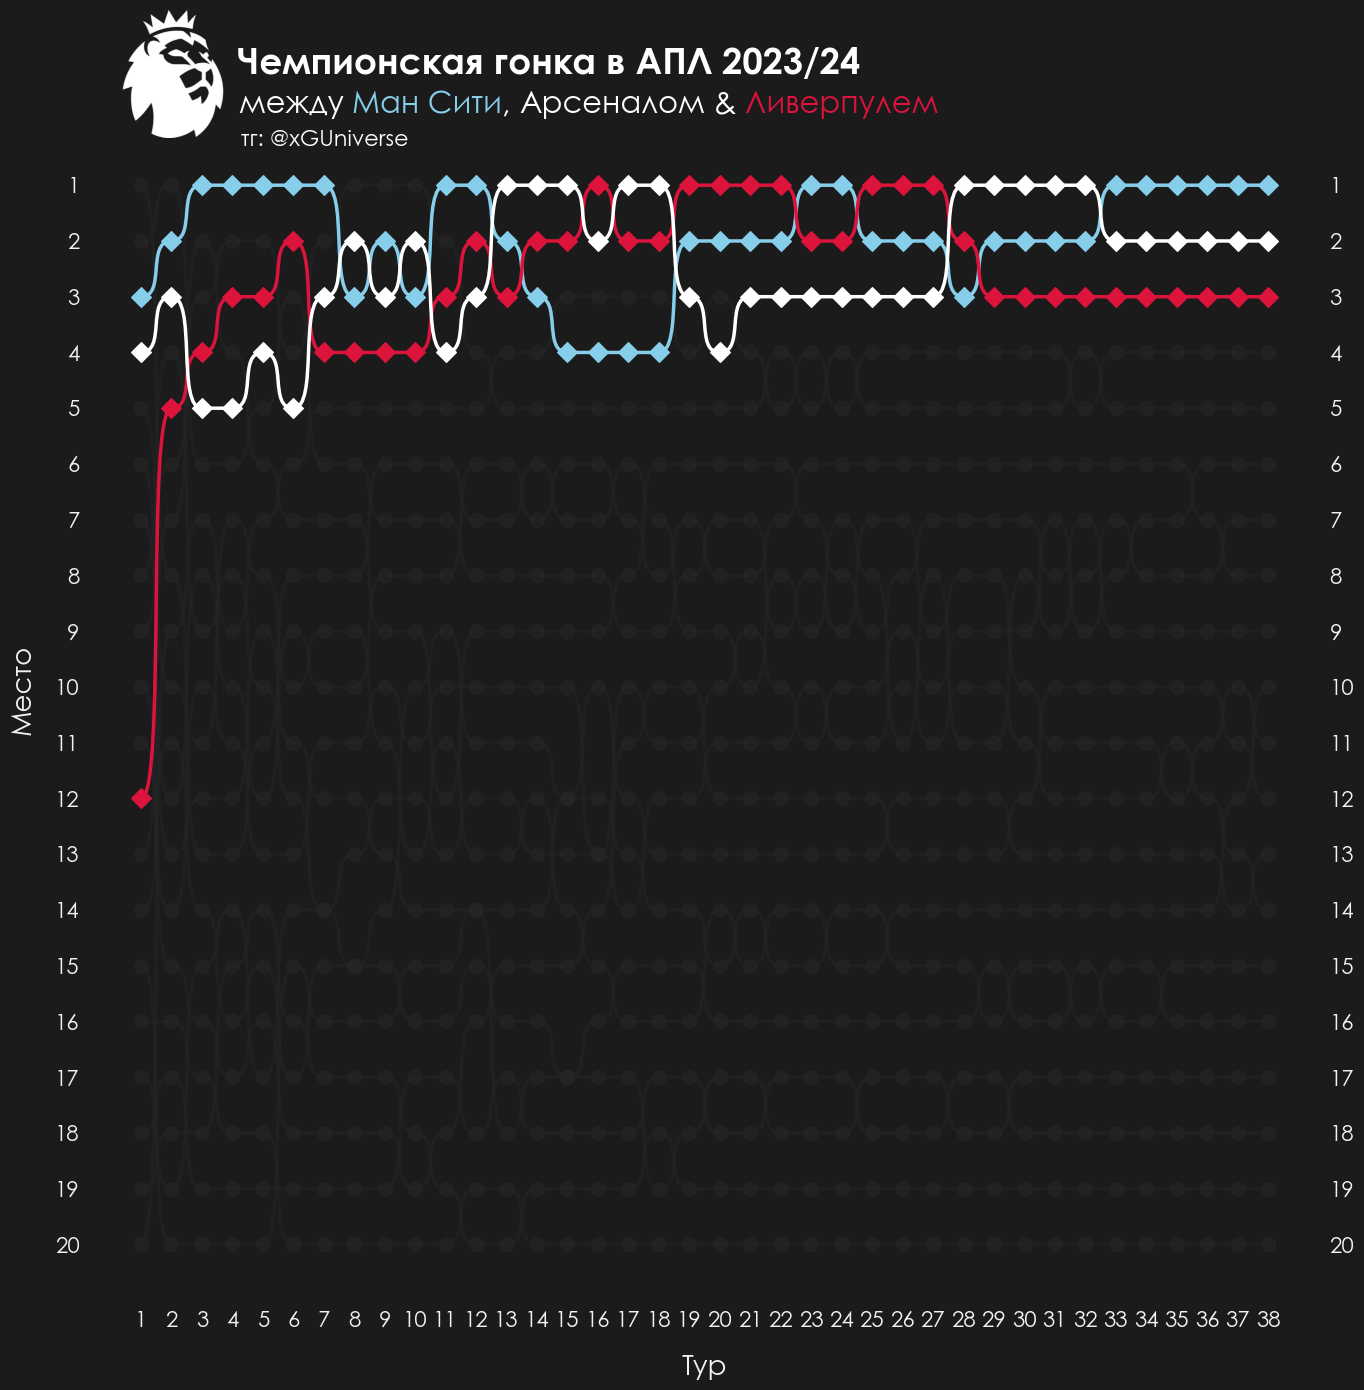

In [171]:
plt.rcParams['font.family'] = 'Century Gothic'

bumpy = Bumpy(
    scatter_color = '#282828', line_color = '#252525',
    ticklabel_size = 16,
    scatter_primary = 'D',
    show_right = True,
    plot_labels = True,
)

#highlight dictionary to pass in the color. search team color codes in google to get your teams hex colors
highlight_dict = {
    'Manchester City':'skyblue',
    'Arsenal':'white',
    'Liverpool':'crimson',
}

fig,ax = bumpy.plot(
    x_list = np.linspace(1,38,38).astype(int),
    y_list = np.linspace(1,20,20).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (16,16),
    ylim = (-.1,22),
    lw = 2.5
)


# Set axis labels
ax.set_xlabel('Тур')
ax.xaxis.set_label_coords(0.5, -.04)

ax.set_ylabel('Место')
ax.yaxis.set_label_coords(-.04, 0.5)

fig.text(x = .415, y = .88,
        s = 'Чемпионская гонка в АПЛ 2023/24',
        c = 'white',size=26,weight='bold',ha='center',
        )

highlight_text.fig_text(x =.44, y = .87, 
                       s = 'между <Ман Сити>, <Арсеналом> & <Ливерпулем>',
                       highlight_textprops = [
                           {"color":'skyblue'},
                           {"color":'white'},
                           {"color":'crimson'},
                       ],
                        size = 22,
                        color = 'white',
                        ha='center'
                       )

highlight_text.fig_text(x =.275, y = .845, 
                       s = 'тг: @xGUniverse',
                        size = 16,
                        color = 'white',
                        ha = 'center'
                       )


logo_ax = fig.add_axes([0.14, 0.84, 0.08, 0.08], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"https://assets.ifttt.com/images/channels/2114875453/icons/monochrome_large.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

plt.savefig('titleraceru2.png', dpi=400, bbox_inches = 'tight')